In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import os

In [2]:
all_df = pd.read_csv("../project1/Output_Files/genre.csv")

all_df.head(50)

,Unnamed: 0,Title,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Revenue,Box Office,Budget,TMDb Score,IMDb,Rotten Tomatoes,Metascore,Awards,Release Year,Release Month
0,0,Star Wars: The Force Awakens,Action,Adventure,Science Fiction,Fantasy,NaN,NaN,2068223624,936662225,245000000,7.4,7.9,93.0,80.0,Nominated for 5 Oscars. Another 62 wins & 131 ...,2015,12
1,1,Jurassic World,Action,Adventure,Science Fiction,Thriller,NaN,NaN,1671713208,652385625,150000000,6.7,7.0,70.0,59.0,15 wins & 58 nominations.,2015,6
2,2,Furious 7,Action,Thriller,NaN,NaN,NaN,NaN,1515047671,353007020,190000000,7.3,7.1,82.0,67.0,Nominated for 1 Golden Globe. Another 35 wins ...,2015,4
3,3,Avengers: Age of Ultron,Action,Adventure,Science Fiction,NaN,NaN,NaN,1405403694,459005868,250000000,7.3,7.3,75.0,66.0,8 wins & 49 nominations.,2015,4
4,4,Minions,Family,Animation,Adventure,Comedy,NaN,NaN,1156730962,336045770,74000000,6.4,6.4,55.0,56.0,Nominated for 1 BAFTA Film Award. Another 4 wi...,2015,6
5,5,Spectre,Action,Adventure,Thriller,NaN,NaN,NaN,880674609,200074609,245000000,6.5,6.8,63.0,60.0,Won 1 Oscar. Another 7 wins & 36 nominations.,2015,10
6,6,Inside Out,Animation,Family,Adventure,Drama,Comedy,NaN,857611174,356921711,175000000,7.9,8.1,98.0,94.0,Won 1 Oscar. Another 99 wins & 116 nominations.,2015,6
7,7,Mission: Impossible - Rogue Nation,Action,Adventure,NaN,NaN,NaN,NaN,682330139,195042377,150000000,7.2,7.4,94.0,75.0,6 wins & 26 nominations.,2015,7
8,8,The Hunger Games: Mockingjay - Part 2,Action,Adventure,Science Fiction,NaN,NaN,NaN,653428261,281723902,160000000,6.9,6.6,69.0,65.0,16 wins & 34 nominations.,2015,11
9,9,The Martian,Drama,Adventure,Science Fiction,NaN,NaN,NaN,630161890,228433663,108000000,7.7,8.0,91.0,80.0,Nominated for 7 Oscars. Another 38 wins & 192 ...,2015,9


In [3]:
#all_df["Genre"] = all_df["Genre_1"] + " " + all_df["Genre_2"] 

clean_df = all_df[["Title","Budget","Revenue","Rotten Tomatoes","IMDb","Awards","Release Year","Genre_1"]]

clean_df.head(10)

,Title,Budget,Revenue,Rotten Tomatoes,IMDb,Awards,Release Year,Genre_1
0,Star Wars: The Force Awakens,245000000,2068223624,93.0,7.9,Nominated for 5 Oscars. Another 62 wins & 131 ...,2015,Action
1,Jurassic World,150000000,1671713208,70.0,7.0,15 wins & 58 nominations.,2015,Action
2,Furious 7,190000000,1515047671,82.0,7.1,Nominated for 1 Golden Globe. Another 35 wins ...,2015,Action
3,Avengers: Age of Ultron,250000000,1405403694,75.0,7.3,8 wins & 49 nominations.,2015,Action
4,Minions,74000000,1156730962,55.0,6.4,Nominated for 1 BAFTA Film Award. Another 4 wi...,2015,Family
5,Spectre,245000000,880674609,63.0,6.8,Won 1 Oscar. Another 7 wins & 36 nominations.,2015,Action
6,Inside Out,175000000,857611174,98.0,8.1,Won 1 Oscar. Another 99 wins & 116 nominations.,2015,Animation
7,Mission: Impossible - Rogue Nation,150000000,682330139,94.0,7.4,6 wins & 26 nominations.,2015,Action
8,The Hunger Games: Mockingjay - Part 2,160000000,653428261,69.0,6.6,16 wins & 34 nominations.,2015,Action
9,The Martian,108000000,630161890,91.0,8.0,Nominated for 7 Oscars. Another 38 wins & 192 ...,2015,Drama


In [4]:
action_df = clean_df.loc[clean_df["Genre_1"] == "Action"]
action_df.head(10)

,Title,Budget,Revenue,Rotten Tomatoes,IMDb,Awards,Release Year,Genre_1
0,Star Wars: The Force Awakens,245000000,2068223624,93.0,7.9,Nominated for 5 Oscars. Another 62 wins & 131 ...,2015,Action
1,Jurassic World,150000000,1671713208,70.0,7.0,15 wins & 58 nominations.,2015,Action
2,Furious 7,190000000,1515047671,82.0,7.1,Nominated for 1 Golden Globe. Another 35 wins ...,2015,Action
3,Avengers: Age of Ultron,250000000,1405403694,75.0,7.3,8 wins & 49 nominations.,2015,Action
5,Spectre,245000000,880674609,63.0,6.8,Won 1 Oscar. Another 7 wins & 36 nominations.,2015,Action
7,Mission: Impossible - Rogue Nation,150000000,682330139,94.0,7.4,6 wins & 26 nominations.,2015,Action
8,The Hunger Games: Mockingjay - Part 2,160000000,653428261,69.0,6.6,16 wins & 34 nominations.,2015,Action
14,San Andreas,110000000,473990832,49.0,6.1,2 wins & 10 nominations.,2015,Action
17,Mad Max: Fury Road,150000000,378858340,97.0,8.1,Won 6 Oscars. Another 239 wins & 231 nominations.,2015,Action
21,Rogue One: A Star Wars Story,200000000,1056057273,84.0,7.8,Nominated for 2 Oscars. Another 24 wins & 81 n...,2016,Action


In [5]:
family_df = clean_df.loc[clean_df["Genre_1"] == "Family"]
family_df.head(12)

,Title,Budget,Revenue,Rotten Tomatoes,IMDb,Awards,Release Year,Genre_1
4,Minions,74000000,1156730962,55.0,6.4,Nominated for 1 BAFTA Film Award. Another 4 wi...,2015,Family
15,Hotel Transylvania 2,80000000,473226958,55.0,6.7,1 win & 10 nominations.,2015,Family
32,Sing,75000000,634151679,72.0,7.1,Nominated for 2 Golden Globes. Another 3 wins ...,2016,Family
40,Beauty and the Beast,160000000,1263521126,71.0,7.1,Nominated for 2 Oscars. Another 15 wins & 72 n...,2017,Family
49,Coco,175000000,800526015,97.0,8.4,Won 2 Oscars. Another 109 wins & 40 nominations.,2017,Family
73,Ralph Breaks the Internet,175000000,529221154,88.0,7.0,Nominated for 1 Oscar. Another 3 wins & 66 nom...,2018,Family
80,Frozen II,150000000,1450026933,78.0,6.9,Nominated for 1 Oscar. Another 18 wins & 88 no...,2019,Family
90,Maleficent: Mistress of Evil,185000000,491570967,39.0,6.6,Nominated for 1 Oscar. Another 1 win & 10 nomi...,2019,Family


In [6]:
sf_df = clean_df.loc[clean_df["Genre_1"] == "Science Fiction"]
sf_df.head(10)

,Title,Budget,Revenue,Rotten Tomatoes,IMDb,Awards,Release Year,Genre_1
13,Ant-Man,130000000,519311965,82.0,7.3,Nominated for 1 BAFTA Film Award. Another 4 wi...,2015,Science Fiction
16,Terminator Genisys,155000000,440603537,27.0,6.3,10 nominations.,2015,Science Fiction
39,Star Wars: The Last Jedi,200000000,1332539889,90.0,7.0,Nominated for 4 Oscars. Another 26 wins & 99 n...,2017,Science Fiction
65,Venom,116000000,855013954,29.0,6.7,3 wins & 9 nominations.,2018,Science Fiction
70,Ready Player One,175000000,582890172,72.0,7.4,Nominated for 1 Oscar. Another 11 wins & 55 no...,2018,Science Fiction
94,Godzilla: King of the Monsters,170000000,386600138,42.0,6.0,6 wins & 14 nominations.,2019,Science Fiction


In [7]:
adventure_df = clean_df.loc[clean_df["Genre_1"] == "Adventure"]
adventure_df.head(10)

,Title,Budget,Revenue,Rotten Tomatoes,IMDb,Awards,Release Year,Genre_1
19,The Good Dinosaur,175000000,332207671,76.0,6.7,Nominated for 1 Golden Globe. Another 9 wins &...,2015,Adventure
20,Captain America: Civil War,250000000,1153296293,90.0,7.8,16 wins & 72 nominations.,2016,Adventure
22,Finding Dory,200000000,1028570889,94.0,7.3,Nominated for 1 BAFTA Film Award. Another 17 w...,2016,Adventure
24,The Jungle Book,175000000,966550600,94.0,7.4,Won 1 Oscar. Another 32 wins & 54 nominations.,2016,Adventure
25,The Secret Life of Pets,75000000,875457937,72.0,6.5,4 wins & 15 nominations.,2016,Adventure
27,Fantastic Beasts and Where to Find Them,180000000,809342332,74.0,7.3,Won 1 Oscar. Another 14 wins & 54 nominations.,2016,Adventure
30,Moana,150000000,690860472,95.0,7.6,Nominated for 2 Oscars. Another 20 wins & 88 n...,2016,Adventure
38,Ice Age: Collision Course,105000000,408579038,18.0,5.7,2 wins.,2016,Adventure
46,Guardians of the Galaxy Vol. 2,200000000,863756051,85.0,7.6,Nominated for 1 Oscar. Another 15 wins & 57 no...,2017,Adventure
50,Pirates of the Caribbean: Dead Men Tell No Tales,230000000,794861794,29.0,6.5,1 win & 13 nominations.,2017,Adventure


In [8]:
genre = clean_df.groupby(["Genre_1"])
genre_df = genre.count()
genre_df.head(30)

,Title,Budget,Revenue,Rotten Tomatoes,IMDb,Awards,Release Year
Genre_1,,,,,,,
Action,44,44,44,44,44,44,44
Adventure,17,17,17,17,17,17,17
Animation,6,6,6,6,6,6,6
Comedy,1,1,1,1,1,1,1
Crime,1,1,1,1,1,1,1
Drama,4,4,4,4,4,4,4
Family,8,8,8,8,8,8,8
Fantasy,1,1,1,1,1,1,1
Horror,2,2,2,2,2,2,2


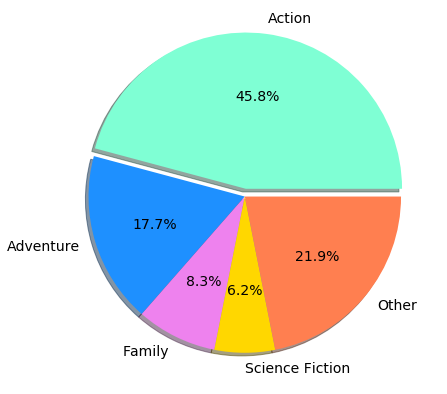

<Figure size 432x288 with 0 Axes>

In [38]:
genre_pie = ["Action", "Adventure", "Family", "Science Fiction", "Other"]
numbers = [44, 17, 8, 6, 21]
explode = (0.05, 0, 0, 0, 0)
colors = ["aquamarine", "dodgerblue", "violet", "gold", "coral"]
plt.figure(figsize = (7,7))
plt.axis("equal")
plt.pie(numbers, labels = genre_pie, colors = colors, explode=explode, autopct="%1.1f%%", shadow = True, textprops={'fontsize': 14})
plt.show()
plt.savefig("Images/Distribution_Genres.png")›

The r-squared value is: 0.37337653559717365
The slope is: 2.7003163127413945
The Y-Intercept is: 400420893.40433884


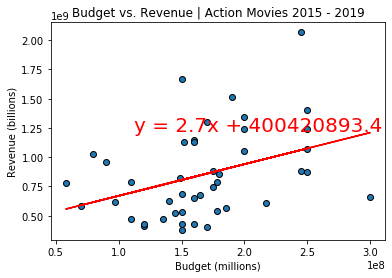

In [13]:
x = action_df["Budget"]
y = action_df["Revenue"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

plt.title("Budget vs. Revenue | Action Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("Revenue (billions)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

#F string the slope is, the intercept is, the r value is (don't round!)

plt.plot(x, regress_value, "r-")

plt.annotate(analysis, xy=(.25, .5), xycoords="axes fraction", color = "red", fontsize =20)

print(f"The r-squared value is: {rvalue}")
print(f"The slope is: {slope}")
print(f"The Y-Intercept is: {intercept}")

plt.savefig("Images/Budget_Revenue_ActionMovies.png")
.
plt.show()

The r-squared value is: -0.11947908242985701
The slope is: -1.5215015183096764e-09
The Y-Intercept is: 7.219688628247154


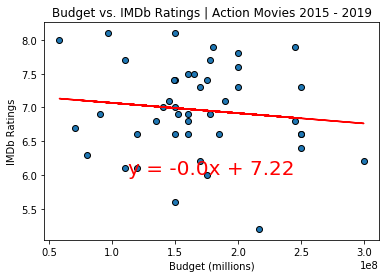

In [14]:
x = action_df["Budget"]
y = action_df["IMDb"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

plt.title("Budget vs. IMDb Ratings | Action Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("IMDb Ratings")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis, xy=(.25, .3), xycoords="axes fraction", color = "red", fontsize = 20)

print(f"The r-squared value is: {rvalue}")
print(f"The slope is: {slope}")
print(f"The Y-Intercept is: {intercept}")

plt.savefig("Images/Budget_Ratings_ActionMovies.png")

plt.show()

The r-squared value is: 0.011794927394165025
The slope is: 0.09288263259627623
The Y-Intercept is: 837402480.8239499


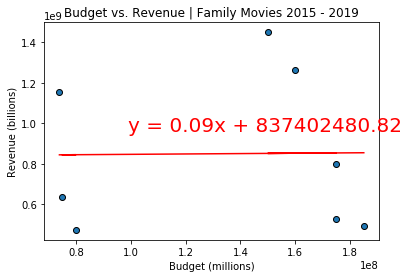

In [15]:
x = family_df["Budget"]
y = family_df["Revenue"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

#plt.xlim(7.4, 8.0)
#plt.ylim(.50, 2.00)

plt.title("Budget vs. Revenue | Family Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("Revenue (billions)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis, xy=(.25, .5), xycoords="axes fraction", color = "red", fontsize = 20)

print(f"The r-squared value is: {rvalue}")
print(f"The slope is: {slope}")
print(f"The Y-Intercept is: {intercept}")

plt.savefig("Images/Budget_Revenue_FamilyMovies.png")

plt.show()

The r-squared value is: 0.40240847592801
The slope is: 4.987715715004587e-09
The Y-Intercept is: 6.355399165260635


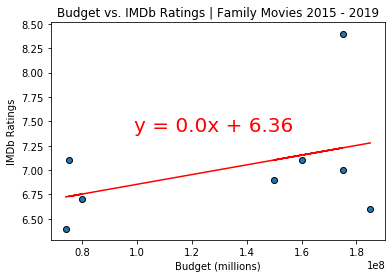

In [16]:
x = family_df["Budget"]
y = family_df["IMDb"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

plt.title("Budget vs. IMDb Ratings | Family Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("IMDb Ratings")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis, xy=(.25, .5), xycoords="axes fraction", color = "red", fontsize = 20)

print(f"The r-squared value is: {rvalue}")
print(f"The slope is: {slope}")
print(f"The Y-Intercept is: {intercept}")

plt.savefig("Images/Budget_Ratings_FamilyMovies.png")

plt.show()

The r-squared value is: 0.007771008316512648
The slope is: 1.4025245441795344e-10
The Y-Intercept is: 6.761220196353436


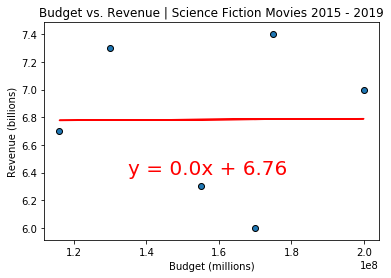

In [17]:
x = sf_df["Budget"]
y = sf_df["IMDb"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

plt.title("Budget vs. Revenue | Science Fiction Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("Revenue (billions)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis, xy=(.25, .3), xycoords="axes fraction", color = "red", fontsize = 20)

print(f"The r-squared value is: {rvalue}")
print(f"The slope is: {slope}")
print(f"The Y-Intercept is: {intercept}")

plt.savefig("Images/Budget_Revenue_ScienceFictionMovies.png")

plt.show()

The r-squared value is: 0.007771008316512648
The slope is: 1.4025245441795344e-10
The Y-Intercept is: 6.761220196353436


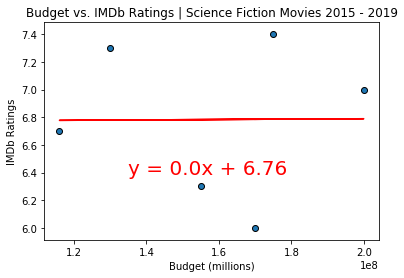

In [18]:
x = sf_df["Budget"]
y = sf_df["IMDb"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

#plt.xlim(7.4, 8.0)
#plt.ylim(.50, 2.00)

plt.title("Budget vs. IMDb Ratings | Science Fiction Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("IMDb Ratings")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis, xy=(.25, .3), xycoords="axes fraction", color = "red", fontsize = 20)

print(f"The r-squared value is: {rvalue}")
print(f"The slope is: {slope}")
print(f"The Y-Intercept is: {intercept}")

plt.savefig("Images/Budget_Ratings_ScienceFictionMovies.png")

plt.show()

The r-squared value is: 0.8201201313625246
The slope is: 7.203430377221383
The Y-Intercept is: -356285204.5024823


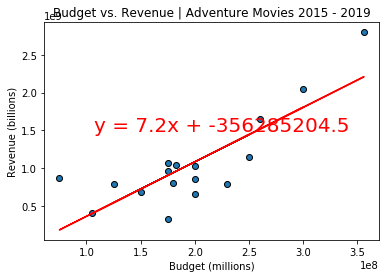

In [19]:
x = adventure_df["Budget"]
y = adventure_df["Revenue"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

plt.title("Budget vs. Revenue | Adventure Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("Revenue (billions)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis, xy=(.15, .5), xycoords="axes fraction", color = "red", fontsize = 20)

print(f"The r-squared value is: {rvalue}")
print(f"The slope is: {slope}")
print(f"The Y-Intercept is: {intercept}")

plt.savefig("Images/Budget_Revenue_AdventureMovies.png")

plt.show()

The r-squared value is: 0.685034012888139
The slope is: 7.159200894938582e-09
The Y-Intercept is: 5.770319306576475


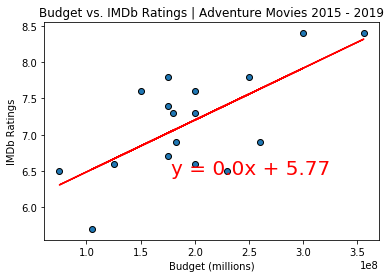

In [20]:
x = adventure_df["Budget"]
y = adventure_df["IMDb"]

plt.scatter(x, y, edgecolors = 'black', linewidths=1, marker="o")

plt.title("Budget vs. IMDb Ratings | Adventure Movies 2015 - 2019")
plt.xlabel("Budget (millions)")
plt.ylabel("IMDb Ratings")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 

analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")

plt.annotate(analysis, xy=(.38, .3), xycoords="axes fraction", color = "red", fontsize = 20)

print(f"The r-squared value is: {rvalue}")
print(f"The slope is: {slope}")
print(f"The Y-Intercept is: {intercept}")

plt.savefig("Images/Budget_Ratings_AdeventureMovies.png")

plt.show()

In [53]:
#Create dataframe with only top 10 grossing films for action movies
action_sml = action_df[["Title", "Budget", "Revenue"]]
top_action = action_sml.sort_values(by=["Revenue"], ascending = False)
test_top_action = top_action[0:10]
test_top_action

,Title,Budget,Revenue
0,Star Wars: The Force Awakens,245000000,2068223624
1,Jurassic World,150000000,1671713208
2,Furious 7,190000000,1515047671
3,Avengers: Age of Ultron,250000000,1405403694
60,Black Panther,200000000,1346739107
61,Jurassic World: Fallen Kingdom,170000000,1303459585
62,Incredibles 2,200000000,1242805359
41,The Fate of the Furious,250000000,1238764765
63,Aquaman,160000000,1148461807
81,Spider-Man: Far from Home,160000000,1131927996


In [55]:
#Create dataframe with only bottom 10 grossing films for action movies
bottom_action = action_sml.sort_values(by=["Revenue"], ascending = True)
test_bottom_action = bottom_action[0:10]
test_bottom_action

,Title,Budget,Revenue
17,Mad Max: Fury Road,150000000,378858340
93,Alita: Battle Angel,170000000,404852543
37,Jason Bourne,120000000,415484914
77,Rampage,120000000,426245950
92,Pokémon Detective Pikachu,150000000,433005346
36,Warcraft,160000000,433677183
75,Bumblebee,135000000,467989645
14,San Andreas,110000000,473990832
34,Kung Fu Panda 3,145000000,521170825
72,The Meg,150000000,530243742


In [40]:
#Create dataframe with only top 10 grossing films for adventure movies
adventure_sml = adventure_df[["Title", "Budget", "Revenue"]]
top_adventure = adventure_sml.sort_values(by=["Revenue"], ascending = False)
test_top_adventure = top_adventure[0:10]
test_top_adventure

,Title,Budget,Revenue
78,Avengers: Endgame,356000000,2797800564
59,Avengers: Infinity War,300000000,2046239637
79,The Lion King,260000000,1656943394
20,Captain America: Civil War,250000000,1153296293
85,Toy Story 4,175000000,1073394593
86,Aladdin,183000000,1047612394
22,Finding Dory,200000000,1028570889
24,The Jungle Book,175000000,966550600
25,The Secret Life of Pets,75000000,875457937
46,Guardians of the Galaxy Vol. 2,200000000,863756051


In [41]:
#Create dataframe with only bottom 10 grossing films for action movies
bottom_adventure = adventure_sml.sort_values(by=["Revenue"], ascending = True)
test_bottom_adventure = bottom_adventure[0:10]
test_bottom_adventure

,Title,Budget,Revenue
19,The Good Dinosaur,175000000,332207671
38,Ice Age: Collision Course,105000000,408579038
68,Fantastic Beasts: The Crimes of Grindelwald,200000000,653355901
30,Moana,150000000,690860472
50,Pirates of the Caribbean: Dead Men Tell No Tales,230000000,794861794
87,Jumanji: The Next Level,125000000,796575993
27,Fantastic Beasts and Where to Find Them,180000000,809342332
46,Guardians of the Galaxy Vol. 2,200000000,863756051
25,The Secret Life of Pets,75000000,875457937
24,The Jungle Book,175000000,966550600
